In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dat vs cat dataset from kaggle.

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:06<00:00, 170MB/s]
100% 812M/812M [00:06<00:00, 129MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset='/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
from zipfile import ZipFile

dataset='/content/train.zip'

with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print('the dataset is extracted')


the dataset is extracted


In [ ]:
import os
#counting  the number of files in train folder
path, dirs, files=next(os.walk('/content/train'))
file_count=len(files)
print('number of images : ', file_count)

number of images :  25000


printing the name of images.

In [ ]:
file_names=os.listdir('/content/train/')
print(file_names)

['cat.1754.jpg', 'dog.8320.jpg', 'dog.11969.jpg', 'dog.668.jpg', 'cat.11451.jpg', 'dog.11200.jpg', 'cat.678.jpg', 'cat.7322.jpg', 'cat.7762.jpg', 'cat.6539.jpg', 'cat.491.jpg', 'cat.10287.jpg', 'dog.5289.jpg', 'dog.626.jpg', 'cat.6799.jpg', 'dog.813.jpg', 'cat.2502.jpg', 'cat.2640.jpg', 'dog.5579.jpg', 'dog.2564.jpg', 'cat.6918.jpg', 'cat.12156.jpg', 'cat.6734.jpg', 'dog.12264.jpg', 'cat.9220.jpg', 'cat.9143.jpg', 'dog.4827.jpg', 'cat.6722.jpg', 'dog.4764.jpg', 'dog.10396.jpg', 'dog.9412.jpg', 'cat.10345.jpg', 'dog.1942.jpg', 'cat.8569.jpg', 'dog.7328.jpg', 'cat.4582.jpg', 'cat.9911.jpg', 'dog.9983.jpg', 'dog.4451.jpg', 'dog.497.jpg', 'dog.8108.jpg', 'cat.8849.jpg', 'dog.1268.jpg', 'cat.12434.jpg', 'dog.2073.jpg', 'dog.2895.jpg', 'dog.6226.jpg', 'dog.8187.jpg', 'dog.6568.jpg', 'dog.1907.jpg', 'dog.5656.jpg', 'dog.10637.jpg', 'dog.11104.jpg', 'cat.10709.jpg', 'dog.1506.jpg', 'dog.783.jpg', 'dog.11121.jpg', 'cat.25.jpg', 'cat.6656.jpg', 'cat.2554.jpg', 'dog.3640.jpg', 'dog.4424.jpg', 'do

importing the dependencies


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split  
from google.colab.patches import cv2_imshow

displaying the images of dogs and cats

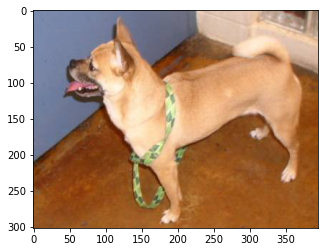

In [ ]:
#display dog image
img = mpimg.imread('/content/train/dog.8320.jpg')
imgplt=plt.imshow(img)
plt.show()



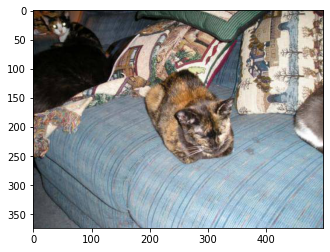

In [ ]:
#display cat image
img = mpimg.imread('/content/train/cat.11365.jpg')
imgplt=plt.imshow(img)
plt.show()

In [ ]:
file_names=os.listdir('/content/train/')
for i in range(5):
   name=file_names[i]
   print(name[0:3])


cat
dog
dog
dog
cat


In [ ]:
file_names=os.listdir('/content/train/')
dog_count=0
cat_count=0

for img_file in file_names:

   name=img_file[0:3]

   if name=='dog':
     dog_count+=1
   else:
      cat_count+=1
print('number of dogs images= ',dog_count)
print('number of cats images= ',cat_count)

number of dogs images=  12500
number of cats images=  12500


resizing all the images 


In [ ]:
#recreating a directory for resized images

In [ ]:
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

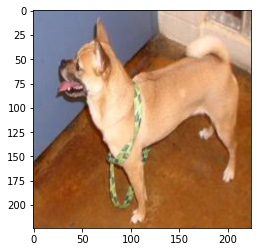

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8320.jpg')
imgplt = plt.imshow(img)
plt.show()

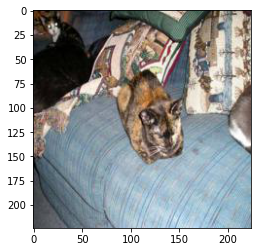

In [ ]:

# display resized catimage
img = mpimg.imread('/content/image resized/cat.11365.jpg')
imgplt = plt.imshow(img)
plt.show()

creating labels for resized images of dogs and cats

cat--->0



dog--->1

In [ ]:
#creating a for loop to assign labels
filenames=os.listdir('/content/image resized')
labels=[]
for i in range(2000):
  file_name=filenames[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.1754.jpg', 'dog.8320.jpg', 'dog.11969.jpg', 'dog.668.jpg', 'cat.11451.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 0]
2000


In [ ]:
#counting images of dogs and cats out of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1047  953]


In [ ]:
#before training our model we have read all the images and convert them to numpy array

import cv2
import glob


In [ ]:
image_directory = '/content/image resized/'
image_extension=['png','jpg']
files=[]
[files.extend(glob.glob(image_directory+'*.'+ e )) for e in image_extension]
dog_cat_images=np.asarray([cv2.imread(file)for file in files])

In [ ]:
print(dog_cat_images)

[[[[  5 100 144]
   [ 13 105 148]
   [ 24 108 150]
   ...
   [148 143 140]
   [148 143 140]
   [149 144 141]]

  [[ 19 107 153]
   [ 22 109 153]
   [ 29 111 153]
   ...
   [149 144 141]
   [149 144 141]
   [149 144 141]]

  [[ 24 102 149]
   [ 22 100 146]
   [ 25 100 144]
   ...
   [150 145 142]
   [150 145 142]
   [151 146 143]]

  ...

  [[ 25  25  31]
   [ 23  23  29]
   [ 26  26  32]
   ...
   [ 61 137 166]
   [ 98 171 201]
   [ 80 152 182]]

  [[ 24  24  30]
   [ 23  23  29]
   [ 28  28  34]
   ...
   [ 78 154 183]
   [103 176 206]
   [ 60 132 162]]

  [[ 23  23  29]
   [ 23  23  29]
   [ 26  26  32]
   ...
   [ 89 165 194]
   [ 72 145 175]
   [ 55 127 157]]]


 [[[171 138 123]
   [171 138 123]
   [171 138 123]
   ...
   [106 125 158]
   [100 118 155]
   [ 97 114 153]]

  [[171 138 123]
   [171 138 123]
   [171 138 123]
   ...
   [105 124 157]
   [103 121 158]
   [102 120 157]]

  [[171 138 123]
   [171 138 123]
   [171 138 123]
   ...
   [105 124 157]
   [106 125 160]
   [108 127

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X=dog_cat_images
Y= np.asarray(labels)

Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)


In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600--->training images


400-->testing images

In [ ]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.03529412 0.01176471 0.01568627]
   [0.03137255 0.00784314 0.01176471]
   [0.02352941 0.00392157 0.00784314]
   ...
   [0.32156863 0.23137255 0.17254902]
   [0.33333333 0.23921569 0.19215686]
   [0.34117647 0.24313725 0.20392157]]

  [[0.03529412 0.01176471 0.01568627]
   [0.03137255 0.00784314 0.01176471]
   [0.02352941 0.00392157 0.00784314]
   ...
   [0.33333333 0.24313725 0.18039216]
   [0.34509804 0.25098039 0.20392157]
   [0.35294118 0.25490196 0.21568627]]

  [[0.03529412 0.01176471 0.01568627]
   [0.03137255 0.00784314 0.01176471]
   [0.02352941 0.00392157 0.00784314]
   ...
   [0.32941176 0.23921569 0.17647059]
   [0.32941176 0.23529412 0.18823529]
   [0.32941176 0.23529412 0.18823529]]

  ...

  [[0.72941176 0.67843137 0.68627451]
   [0.72156863 0.67058824 0.67843137]
   [0.71372549 0.6627451  0.67058824]
   ...
   [0.75686275 0.70588235 0.71372549]
   [0.74901961 0.69803922 0.70588235]
   [0.74509804 0.69411765 0.70196078]]

  [[0.7372549  0.68627451 0.69411765]
   [0.7

building the neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 41s 736ms/step - loss: 0.1759 - acc: 0.9325
Epoch 2/5
50/50 [==============================] - 35s 704ms/step - loss: 0.0576 - acc: 0.9800
Epoch 3/5
50/50 [==============================] - 36s 717ms/step - loss: 0.0425 - acc: 0.9881
Epoch 4/5
50/50 [==============================] - 36s 719ms/step - loss: 0.0324 - acc: 0.9931
Epoch 5/5
50/50 [==============================] - 36s 719ms/step - loss: 0.0259 - acc: 0.9969


In [ ]:
score,acc=model.evaluate(X_test_scaled,Y_test)
print('Test Loss = ',score)
print('Test Accuracy = ',acc)

13/13 [==============================] - 10s 686ms/step - loss: 0.0390 - acc: 0.9925
Test Loss =  0.0389525406062603
Test Accuracy =  0.9925000071525574


predictive system

Path of the image to be predicted : /content/dog.jpg


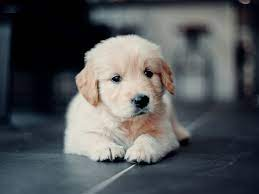

[[-3.715135  2.829925]]
1
the image represents a dog 


In [ ]:
input_image_path=input('Path of the image to be predicted : ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255
image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])

input_prediction=model.predict(image_reshaped)
print(input_prediction)
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==0:
  print('the image represents a cat')
else:
  print('the image represents a dog ')